# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
# Objetive is to predict car price that could benefit both Customer and Dealers, or in other words,
# define features which have high positive correlation with 'price' and 'car value' (factor to be defined), 
# and a dealer should select cars with parameters which shows high correlation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/vehicles.csv')

In [4]:
df.tail(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426870,7301592119,wyoming,22990,2020.0,hyundai,sonata se sedan 4d,good,NaN,gas,3066.0,clean,other,5NPEG4JAXLH051710,fwd,NaN,sedan,blue,wy
426871,7301591639,wyoming,17990,2018.0,kia,sportage lx sport utility 4d,good,NaN,gas,34239.0,clean,other,KNDPMCAC7J7417329,NaN,NaN,SUV,NaN,wy
426872,7301591201,wyoming,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,gas,19059.0,clean,other,55SWF8DB6LU325050,rwd,NaN,sedan,white,wy
426873,7301591202,wyoming,30990,2018.0,mercedes-benz,glc 300 sport,good,NaN,gas,15080.0,clean,automatic,WDC0G4JB6JV019749,rwd,NaN,other,white,wy
426874,7301591199,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,JTHBZ1BLXJA012999,rwd,NaN,sedan,white,wy
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
df.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [7]:
df.describe(percentiles=[0.01,0.05,0.10,0.25,0.5,0.75,0.9,0.95,0.99])

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
1%,7.301962e+09,0.000000e+00,1967.000000,2.000000e+00
5%,7.303150e+09,0.000000e+00,1998.000000,6.318000e+03
10%,7.304399e+09,5.000000e+02,2003.000000,1.493900e+04
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [8]:
# Understand Data Types, number of null values and unique values for each column
# Understand values in String/Object/Categorical features to evaluate if they can be converted into 'dummies' column
# Understand if there is need to replace String/Object values into new values to group them into smaller number of similar categories

# Model feature/columns seems like a composite of various car features like Model Name and Body type thus, 
# we might need to split it into two columns and evalute if there is need for "Body Type" as there is another column 'type' which has similar information
# or drop the 'Model' feature from dataset

# Estimate standard statistics for Numberical Data types
# Plot bar graphs, scatter plots or histograms to understand data distribution

# Convert Model Year to 'age' of car

# Region and State features have common values and 'Region' has 404 unique values thus, will be difficult to model as 'dummies' 

# VIN number is unique identifier for each car and would have no relationship with car price so it can be dropped
# Only 30% of data points have value in 'Size' feature thus, it should be dropped
# Understand if 'paint/color' feature should be dropped as 30% of the values are missing
# Understand if 'drive' feature should be dropped as 30% of the values are missing or should a separate model be created with just 70% of the dataset

# Understand if there is any colinearity between 'Condition', 'Odometer Reading' and 'Year' or 'Age' or drop 'condition' columns as have 40% data missing



In [9]:
df_clean = df.dropna(subset=['year']).set_index('id')
df_clean['age'] = 2022 - df_clean['year'] 

In [10]:
to_drop = ['VIN','size','paint_color','region','year','drive','type','cylinders','condition']
df_clean.drop(labels = to_drop, axis = 1, inplace = True)

In [11]:
df_clean.dropna(inplace = True)

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389604 entries, 7316814884 to 7301591129
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         389604 non-null  int64  
 1   manufacturer  389604 non-null  object 
 2   model         389604 non-null  object 
 3   fuel          389604 non-null  object 
 4   odometer      389604 non-null  float64
 5   title_status  389604 non-null  object 
 6   transmission  389604 non-null  object 
 7   state         389604 non-null  object 
 8   age           389604 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 29.7+ MB


In [13]:
df_clean.describe(percentiles=[0.01,0.05,0.10,0.25,0.5,0.75,0.9,0.95,0.99])

,price,odometer,age
count,3.896040e+05,3.896040e+05,389604.000000
mean,6.395528e+04,9.635240e+04,10.394662
std,1.144865e+07,1.914181e+05,8.639863
min,0.000000e+00,0.000000e+00,0.000000
1%,0.000000e+00,1.503000e+01,2.000000
5%,0.000000e+00,7.500000e+03,2.000000
10%,9.000000e+02,1.577800e+04,3.000000
25%,5.995000e+03,3.809300e+04,5.000000
50%,1.399500e+04,8.575300e+04,8.000000
75%,2.659000e+04,1.333150e+05,13.000000


In [14]:
df_clean.head()

,price,manufacturer,model,fuel,odometer,title_status,transmission,state,age
id,,,,,,,,,
7316814884,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,al,8.0
7316814758,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,al,12.0
7316814989,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,al,2.0
7316743432,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,al,5.0
7316356412,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,al,9.0


In [15]:
df_clean.nunique()

price           14679
manufacturer       41
model           21860
fuel                5
odometer        99827
title_status        6
transmission        3
state              51
age               107
dtype: int64

In [16]:
df_clean['transmission'].unique()

array(['other', 'automatic', 'manual'], dtype=object)

In [17]:
df_clean['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'ferrari', 'mini', 'pontiac',
       'fiat', 'rover', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover'], dtype=object)

In [18]:
df_clean['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [19]:
df_clean['title_status'].unique()

array(['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only'],
      dtype=object)

In [20]:
df_clean['manufacturer'].value_counts()

ford               67811
chevrolet          52326
toyota             32509
honda              20407
jeep               18150
nissan             18053
ram                16770
gmc                15941
bmw                14224
dodge              12864
mercedes-benz      11195
hyundai             9872
subaru              9159
volkswagen          9026
kia                 8120
lexus               7907
audi                7322
cadillac            6555
acura               5807
chrysler            5699
buick               5291
mazda               5193
infiniti            4679
lincoln             4019
volvo               3221
mitsubishi          3096
mini                2287
pontiac             2195
jaguar              1892
rover               1752
porsche             1294
mercury             1145
saturn              1044
alfa-romeo           887
tesla                818
fiat                 768
harley-davidson      124
ferrari               75
datsun                62
aston-martin          24


In [21]:
df_clean[['manufacturer','model']].value_counts()

manufacturer  model            
ford          f-150                7786
chevrolet     silverado 1500       4968
ram           1500                 4004
toyota        camry                3050
chevrolet     silverado            2946
                                   ... 
gmc           1994 3500hd             1
              2005                    1
              2011 terrain            1
              2500 4x4 crew cab       1
honda         accord exv6             1
Length: 22274, dtype: int64

In [22]:
df_clean['state'].value_counts()

ca    45131
fl    25790
tx    21212
ny    18197
oh    16133
or    15754
mi    15195
nc    13696
pa    12501
wa    11991
wi    10566
tn    10223
co    10024
va     9946
il     9558
nj     8842
id     8550
az     7937
ia     7555
ma     7542
mn     7280
ga     6439
ok     6286
ks     5799
mt     5743
sc     5714
in     5363
ct     4700
md     4476
al     4444
mo     4092
nm     4081
ky     3909
ar     3798
ak     3316
la     2909
nv     2884
nh     2803
dc     2749
me     2747
hi     2534
vt     2345
ri     2056
sd     1203
ut     1036
wv      975
ms      906
de      887
ne      866
wy      558
nd      363
Name: state, dtype: int64

In [23]:
# drop all status except 'clean'
df_clean['title_status'].value_counts()
df_clean = df_clean.loc[df_clean['title_status']=='clean']

In [24]:
df_clean['model_split'] = df_clean['model'].str.split(" ")

In [25]:
df_clean['model2'] = df_clean['model_split'].str[0]
df_clean['model3'] = df_clean['model_split'].str[1]

In [26]:
# splitting model column into two columns model2 and model3 where model2 column holds 'product type' 
# and 'model 3' is variation of the product type
df_clean.drop('model_split', axis=1, inplace = True)

In [36]:
df_clean['model2'] = df_clean['model2'].str.replace("-","")

In [37]:
df_clean['model2'].value_counts()

silverado     16118
f150          14989
1500           8653
sierra         8214
wrangler       7553
              ...  
excape            1
fiesta/at         1
1500/4x4          1
hoghlander        1
gand              1
Name: model2, Length: 2822, dtype: int64

In [38]:
df_clean['model3'].value_counts()

1500                  13565
sport                  6240
super                  5029
series                 5001
se                     4813
                      ...  
limited/navigation        1
2500-hd                   1
supr                      1
ex-gdi                    1
3a                        1
Name: model3, Length: 2392, dtype: int64

In [29]:
df_clean.nunique()

price           14574
manufacturer       41
model           21254
fuel                5
odometer        98081
title_status        1
transmission        3
state              51
age               107
model2           2970
model3           2392
dtype: int64

In [39]:
#eliminating rows with model2 values count < 1000
counts = df_clean['model2'].value_counts()
mask = counts >=1000
select_model2 = counts[mask].index
df_clean = df_clean.loc[df_clean['model2'].isin(select_model2)]

In [40]:
# If we eliminate rows with model3 value counts <10 than it impacts impact data set significantly and thus, we will drop model3 column 
#counts = df_clean['model3'].value_counts()
#mask = counts >=10
#select_model3 = counts[mask].index
#df_clean_model = df_clean.loc[df_clean['model3'].isin(select_model3)]
df_clean.drop('model3', axis = 1, inplace = True)

In [ ]:
df_clean.info()

In [41]:
# we will drop model column and only use model2 column with 952 unique values but if it will be difficult to process than we might to drop certain models with low count
df_clean.drop('model', axis = 1, inplace = True)
df_clean.nunique()

price           12269
manufacturer       29
fuel                5
odometer        75729
title_status        1
transmission        3
state              51
age                82
model2             98
dtype: int64

In [42]:
counts = df_clean['manufacturer'].value_counts()
mask = counts > 200
select_mfg = counts[mask].index
df_clean = df_clean.loc[df_clean['manufacturer'].isin(select_mfg)]

In [43]:
df_clean.nunique()

price           12269
manufacturer       27
fuel                5
odometer        75728
title_status        1
transmission        3
state              51
age                82
model2             98
dtype: int64

In [44]:
df_clean['transmission'].value_counts()

automatic    211512
other         36155
manual        11471
Name: transmission, dtype: int64

In [45]:
df_clean['title_status'].value_counts()

clean    259138
Name: title_status, dtype: int64

In [46]:
df_clean['state'].value_counts()

ca    28868
fl    16964
tx    14486
ny    12029
or    11289
oh    10561
mi    10524
nc     8906
wa     8690
pa     7806
va     6913
wi     6897
tn     6746
co     6735
il     6383
id     6169
nj     5437
az     5068
ia     4941
mn     4893
ma     4837
ok     4416
ga     4216
mt     4204
ks     3908
sc     3625
in     3501
al     3112
ct     3061
md     2808
mo     2739
ar     2626
ky     2587
nm     2513
ak     2220
la     2019
me     1989
nh     1979
vt     1718
dc     1697
nv     1671
hi     1551
ri     1260
sd      818
wv      675
ms      666
ne      618
ut      612
de      590
wy      355
nd      242
Name: state, dtype: int64

In [47]:
df_clean.head()

,price,manufacturer,fuel,odometer,title_status,transmission,state,age,model2
id,,,,,,,,,
7316814884,33590,gmc,gas,57923.0,clean,other,al,8.0,sierra
7316814758,22590,chevrolet,gas,71229.0,clean,other,al,12.0,silverado
7316814989,39590,chevrolet,gas,19160.0,clean,other,al,2.0,silverado
7316743432,30990,toyota,gas,41124.0,clean,other,al,5.0,tundra
7316356412,15000,ford,gas,128000.0,clean,automatic,al,9.0,f150


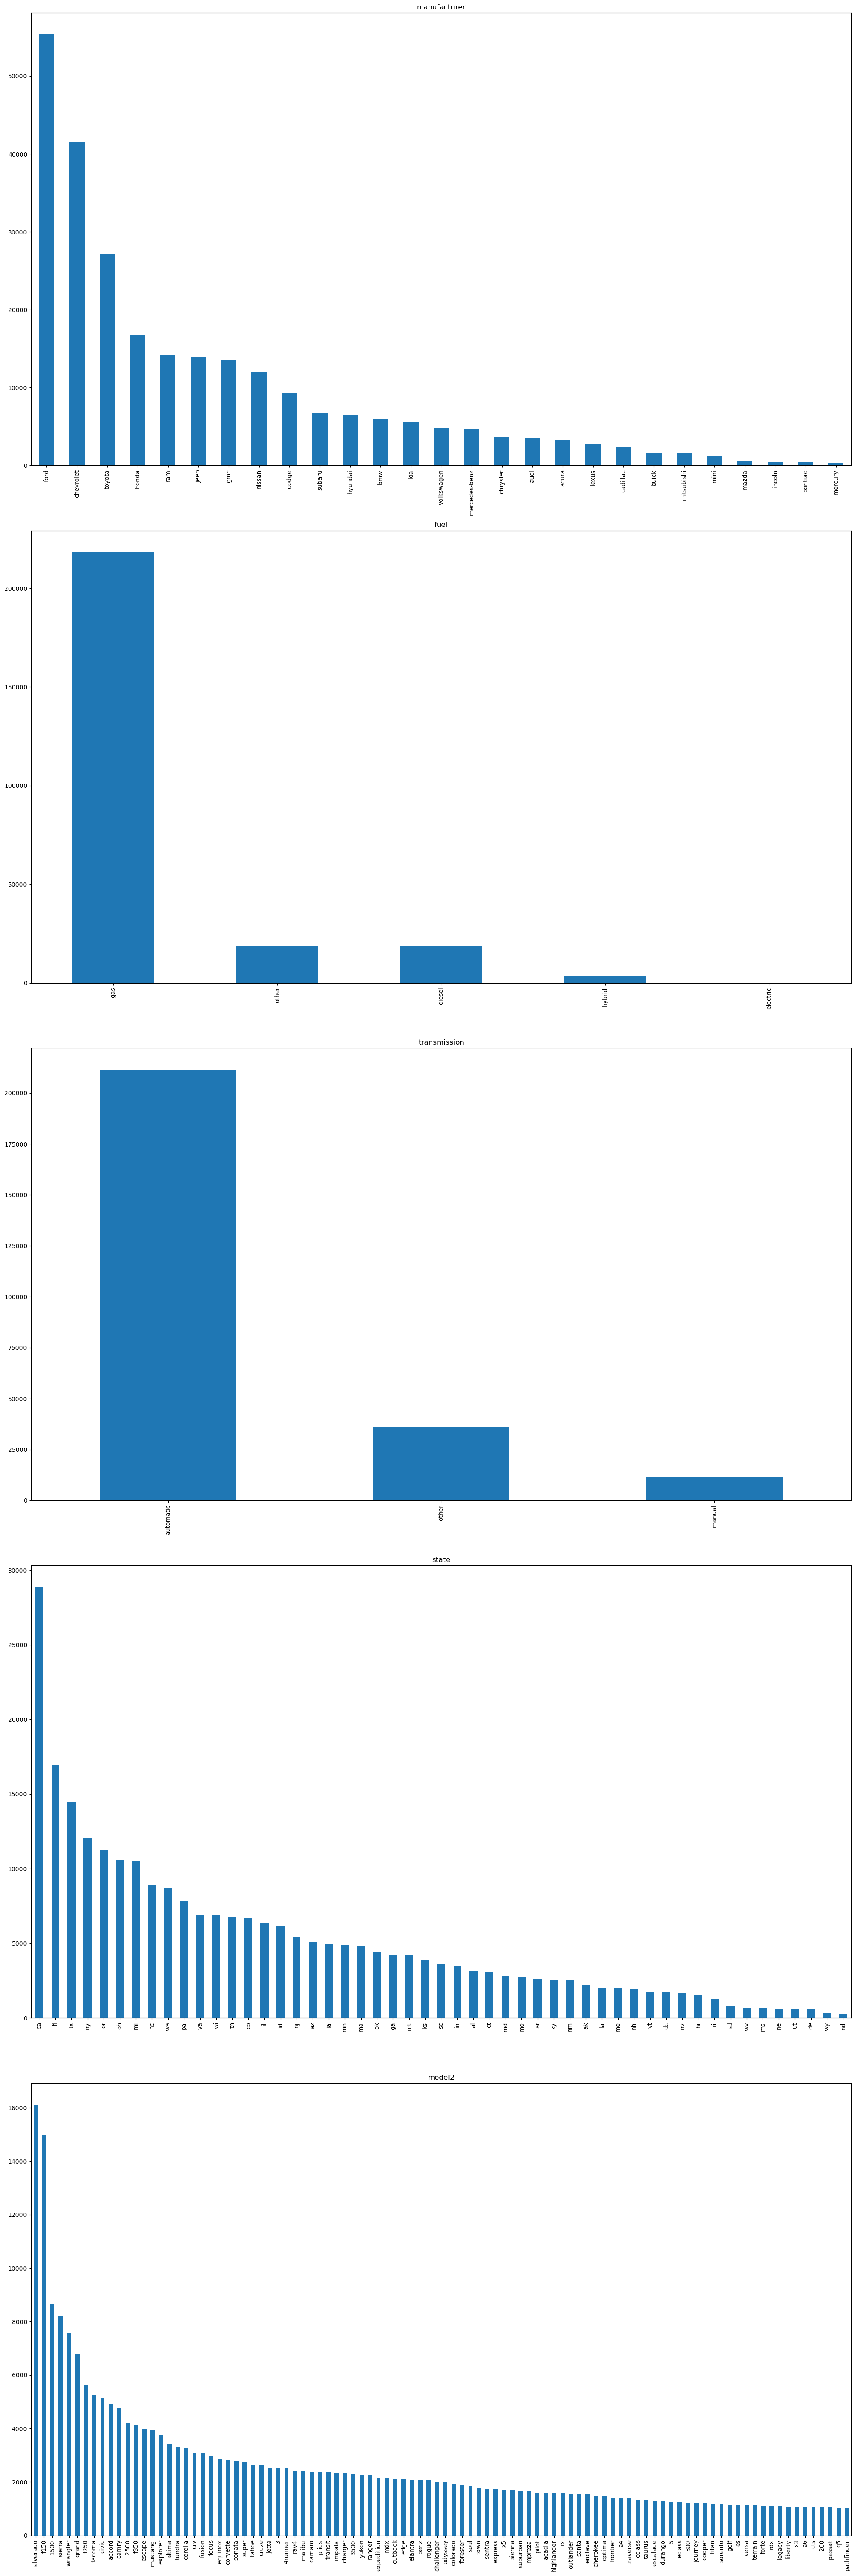

In [48]:
# plot count plots for all categorical variables

cat_plot_vars = ['manufacturer','fuel','transmission','state','model2']

fig, axs = plt.subplots(nrows = 5, figsize = (20,60))

for i, column in enumerate(cat_plot_vars):
    row = i
    #col = i%2
    df_clean[column].value_counts().plot(kind = 'bar', ax =axs[row],)
    axs[row].set_title(column)
    fig.tight_layout()
    
        
plt.show()

In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259138 entries, 7316814884 to 7301591140
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         259138 non-null  int64  
 1   manufacturer  259138 non-null  object 
 2   fuel          259138 non-null  object 
 3   odometer      259138 non-null  float64
 4   title_status  259138 non-null  object 
 5   transmission  259138 non-null  object 
 6   state         259138 non-null  object 
 7   age           259138 non-null  float64
 8   model2        259138 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 19.8+ MB


In [50]:
df_clean.nunique()

price           12269
manufacturer       27
fuel                5
odometer        75728
title_status        1
transmission        3
state              51
age                82
model2             98
dtype: int64

In [ ]:
# graphing numberical values in box plot 

In [ ]:
df_clean.info()

In [51]:
# there are outliers so it's better to drop outisde of 99% i.e. outliers 
df_clean.describe(percentiles=[0.01,0.05,0.10,0.25,0.5,0.75,0.9,0.95,0.99])

,price,odometer,age
count,2.591380e+05,2.591380e+05,259138.000000
mean,8.192309e+04,9.903655e+04,9.582585
std,1.382243e+07,1.842103e+05,6.538120
min,0.000000e+00,0.000000e+00,0.000000
1%,0.000000e+00,1.000000e+02,2.000000
5%,0.000000e+00,9.412850e+03,2.000000
10%,4.857000e+02,1.780500e+04,3.000000
25%,6.200000e+03,4.078400e+04,5.000000
50%,1.450000e+04,9.027300e+04,8.000000
75%,2.750000e+04,1.372360e+05,12.000000


'\nfor i, column in enumerate(num_plot_vars):\n    mean = df_clean[column].mean()\n    std = df_clean[column].std()\n    lower = max(mean - 3*std,0)\n    upper = mean + 3*std\n    df_clean2 = df_clean[(df_clean[column]>lower) & (df_clean[column] < upper)]     \n    print(mean,std,lower,upper)\n'

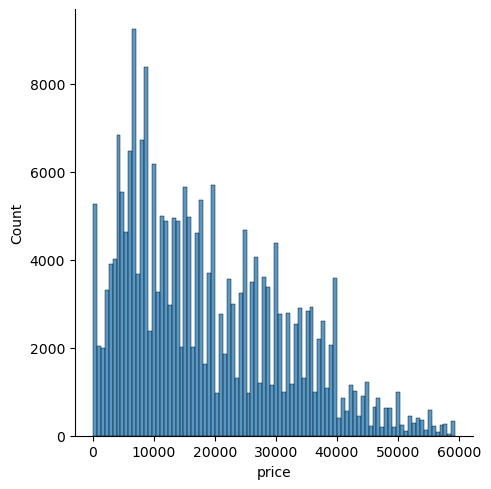

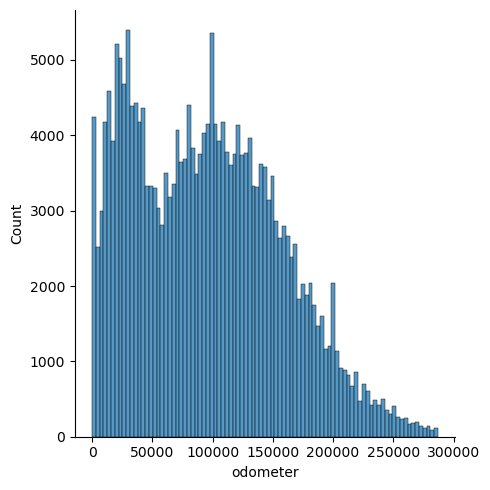

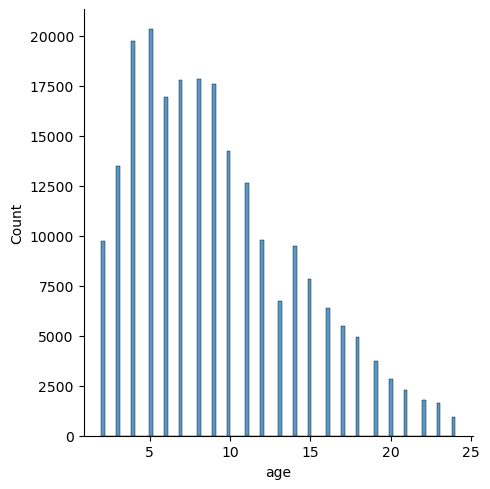

In [52]:
# removing outliers from numberical features

num_plot_vars = ['price','odometer','age']

for i, column in enumerate(num_plot_vars):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = max(Q1 - 1.5*IQR,1)
    upper = Q3 + 1.5*IQR
    df_clean = df_clean[(df_clean[column]>lower) & (df_clean[column] < upper)]
    
    sns.displot(df_clean[column])
    #print(column,Q1,Q3,IQR,lower,upper)
  
'''
for i, column in enumerate(num_plot_vars):
    mean = df_clean[column].mean()
    std = df_clean[column].std()
    lower = max(mean - 3*std,0)
    upper = mean + 3*std
    df_clean2 = df_clean[(df_clean[column]>lower) & (df_clean[column] < upper)]     
    print(mean,std,lower,upper)
'''

C:\Users\a72016\AppData\Local\Temp\ipykernel_156512\1832626386.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean.corr(), annot=True)


<Axes: >

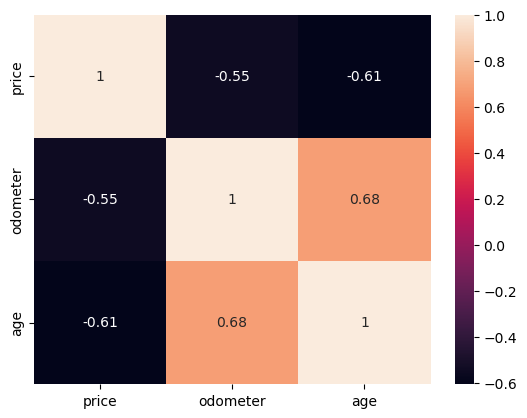

In [53]:
sns.heatmap(df_clean.corr(), annot=True)

In [150]:
df_clean.head()

,price,manufacturer,fuel,odometer,title_status,transmission,state,age,model2
id,,,,,,,,,
7316814884,33590,gmc,gas,57923.0,clean,other,al,8.0,sierra
7316814758,22590,chevrolet,gas,71229.0,clean,other,al,12.0,silverado
7316814989,39590,chevrolet,gas,19160.0,clean,other,al,2.0,silverado
7316743432,30990,toyota,gas,41124.0,clean,other,al,5.0,tundra
7316356412,15000,ford,gas,128000.0,clean,automatic,al,9.0,f150


In [ ]:
# drop all rows with empty cells
'''
df_cleanest = df_clean.dropna()
# dropping all na values reduces the dataset to 127232 rows from 426880 so we will need to compare the orignal dataset to undertand if,
# it is still a good representation of orignal dataset
df_cleanest.info()
# To check if there are any outliers
# Here we conclude that we don't have any outliers as the values are gradually increasing
# except (few) zero for price and odometer readhing and 1900 for year 
# which we would need to either drop or update with average data of similar model and year!
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])
# checking % of missing value to understand if it's ok to drop null values for that feature/column
df.isna().sum()/df['state'].count()*100
'''

In [54]:
X = df_clean.drop(columns = ['price'])
y = df_clean['price']

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer

In [56]:
# Creating Train and Test Data
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1000)

In [99]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 67243 entries, 7314734138 to 7316106488
Series name: price
Non-Null Count  Dtype
--------------  -----
67243 non-null  int64
dtypes: int64(1)
memory usage: 1.0 MB


In [58]:
# Step 1 will be Column Transformation to convert Categorical values to numerical values
step1 = ColumnTransformer(transformers = [
    ('ohe',OneHotEncoder(sparse = False),[0,1,3,4,5,7])],remainder='passthrough')

In [59]:
step2 = LinearRegression()

In [60]:
pipe_lr = Pipeline([('step1',step1),
                 ('step2',step2)])

In [61]:
pipe_lr.fit(X_train,y_train)

C:\Users\a72016\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 3, 4, 5, 7])])),
                ('step2', LinearRegression())])

In [62]:
y_pred = pipe_lr.predict(X_train)
print('mse is '+ str(mean_squared_error(y_pred,y_train)))
print('r2-score is ' + str(r2_score(y_pred,y_train)))

mse is 41896287.57570518
r2-score is 0.6691577696108386


In [63]:
y_pred = pipe_lr.predict(X_test)
print('mse is '+ str(mean_squared_error(y_pred,y_test)))
print('r2-score is ' + str(r2_score(y_pred,y_test)))

mse is 40581552.64102557
r2-score is 0.6811381057436273


In [64]:
features_names = pipe_lr.named_steps['step1'].get_feature_names_out()
importance = pipe_lr.named_steps['step2'].coef_

In [65]:
lr_features = pd.DataFrame({'feature':features_names, 'importance':importance})
lr_features = lr_features.sort_values('importance', ascending = False)
lr_features

,feature,importance
170,ohe__model2_super,37984.584890
129,ohe__model2_f350,36372.352389
128,ohe__model2_f250,36211.163846
127,ohe__model2_f150,32266.266069
124,ohe__model2_expedition,28462.118717
...,...,...
168,ohe__model2_soul,-20768.394003
166,ohe__model2_sonata,-21133.093609
132,ohe__model2_forte,-21176.290017
118,ohe__model2_elantra,-22714.999259


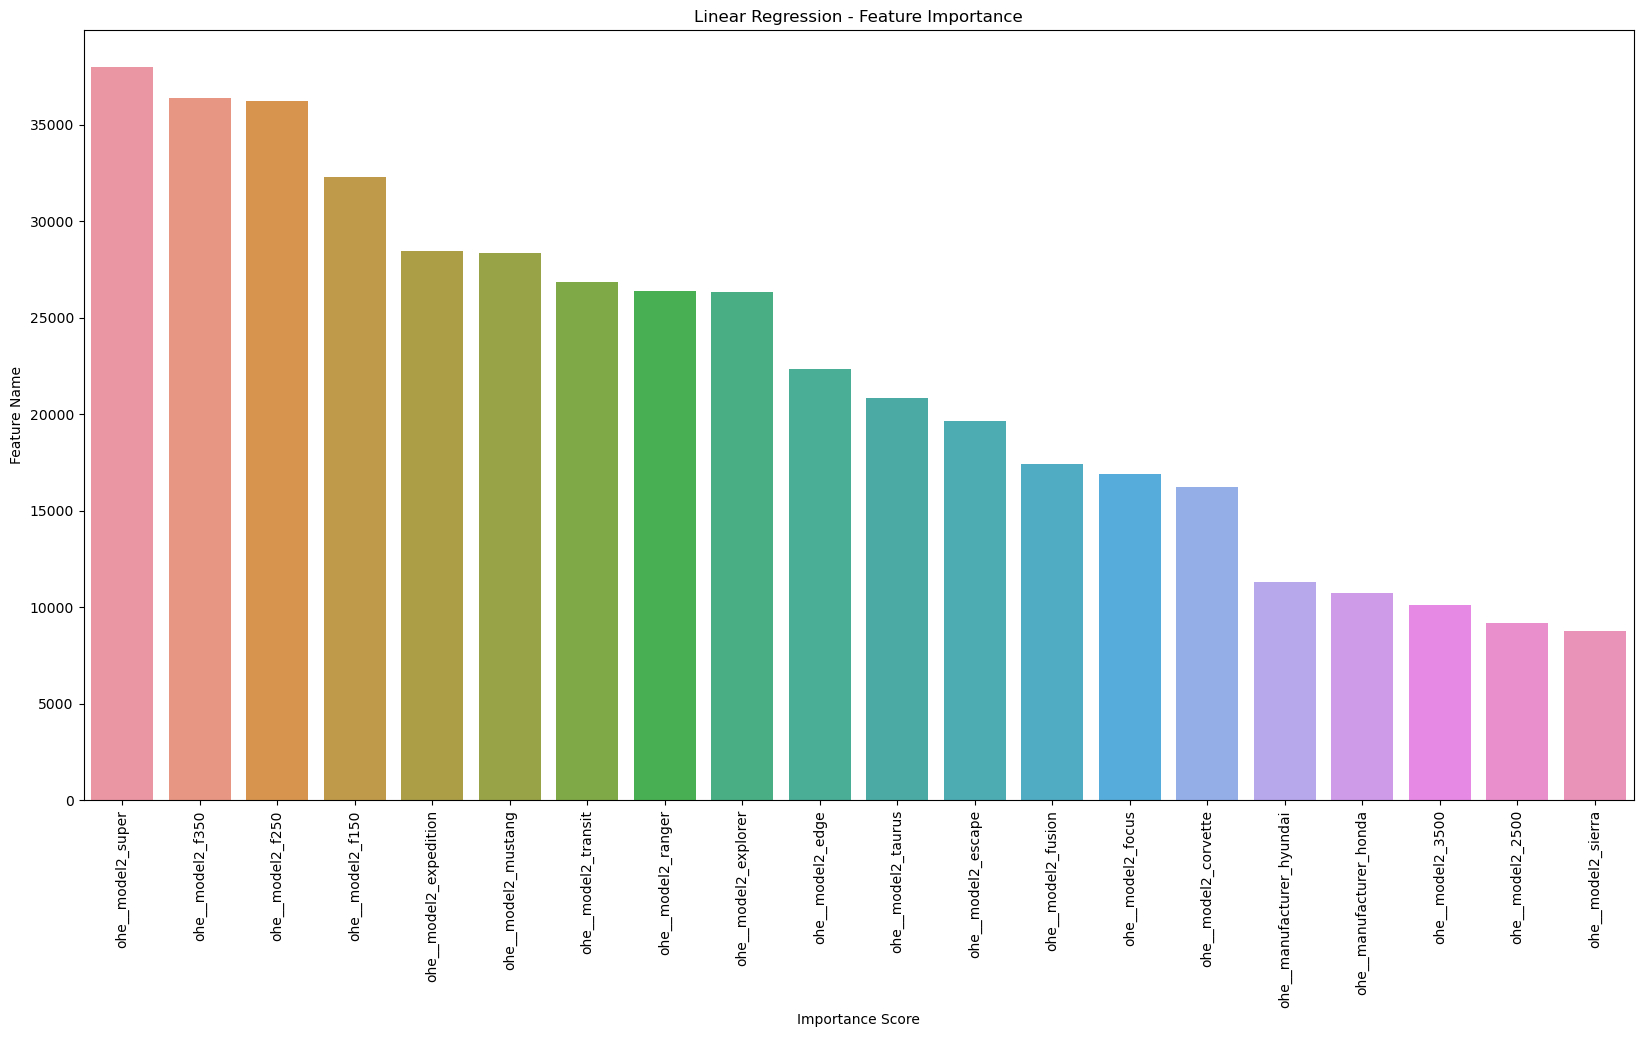

In [66]:
plt.figure(figsize = (20,10))
sns.barplot(data = lr_features.head(20), x='feature', y='importance')
plt.title('Linear Regression - Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.xticks(rotation = 90)
plt.show()

In [67]:
# need to map features to original dataset to understand which featureset are important for higher price
lr_features['str split'] = lr_features['feature'].str.split("__")

In [ ]:
lr_features

In [68]:
lr_features['ohe'] = lr_features['str split'].str[0]

In [69]:
lr_features['str split2'] = lr_features['feature'].str.split("_")

In [70]:
lr_features['feature_val'] = lr_features['str split2'].str[3]

In [71]:
lr_features['feature_m'] = lr_features['str split2'].str[2]

In [72]:
lr_features.drop(['feature','str split','str split2','ohe'], axis = 1, inplace = True)

In [73]:
lr_features.head()

,importance,feature_val,feature_m
170,37984.584890,super,model2
129,36372.352389,f350,model2
128,36211.163846,f250,model2
127,32266.266069,f150,model2
124,28462.118717,expedition,model2


In [76]:
lr_features.sort_values(by = ['feature_m','importance','feature_val'])

,importance,feature_val,feature_m
186,-1.127950e+03,NaN,age
28,-2.111013e+03,electric,fuel
29,-1.889596e+03,gas,fuel
31,-1.418482e+03,other,fuel
30,-1.140669e+03,hybrid,fuel
...,...,...,...
62,3.147500e+03,mt,state
32,1.077410e-09,status,title
33,-1.098292e+03,automatic,transmission
34,3.020286e+02,manual,transmission


In [90]:
# plot 
plot_feature = lr_features['feature_m'].unique()
plot_feature

array(['model2', 'manufacturer', 'fuel', 'state', 'transmission', 'title',
       'odometer', 'age'], dtype=object)

In [91]:
plot_feature = {'model2', 'manufacturer', 'fuel', 'state', 'transmission'}
plot_feature_num = {'odometer', 'age'}

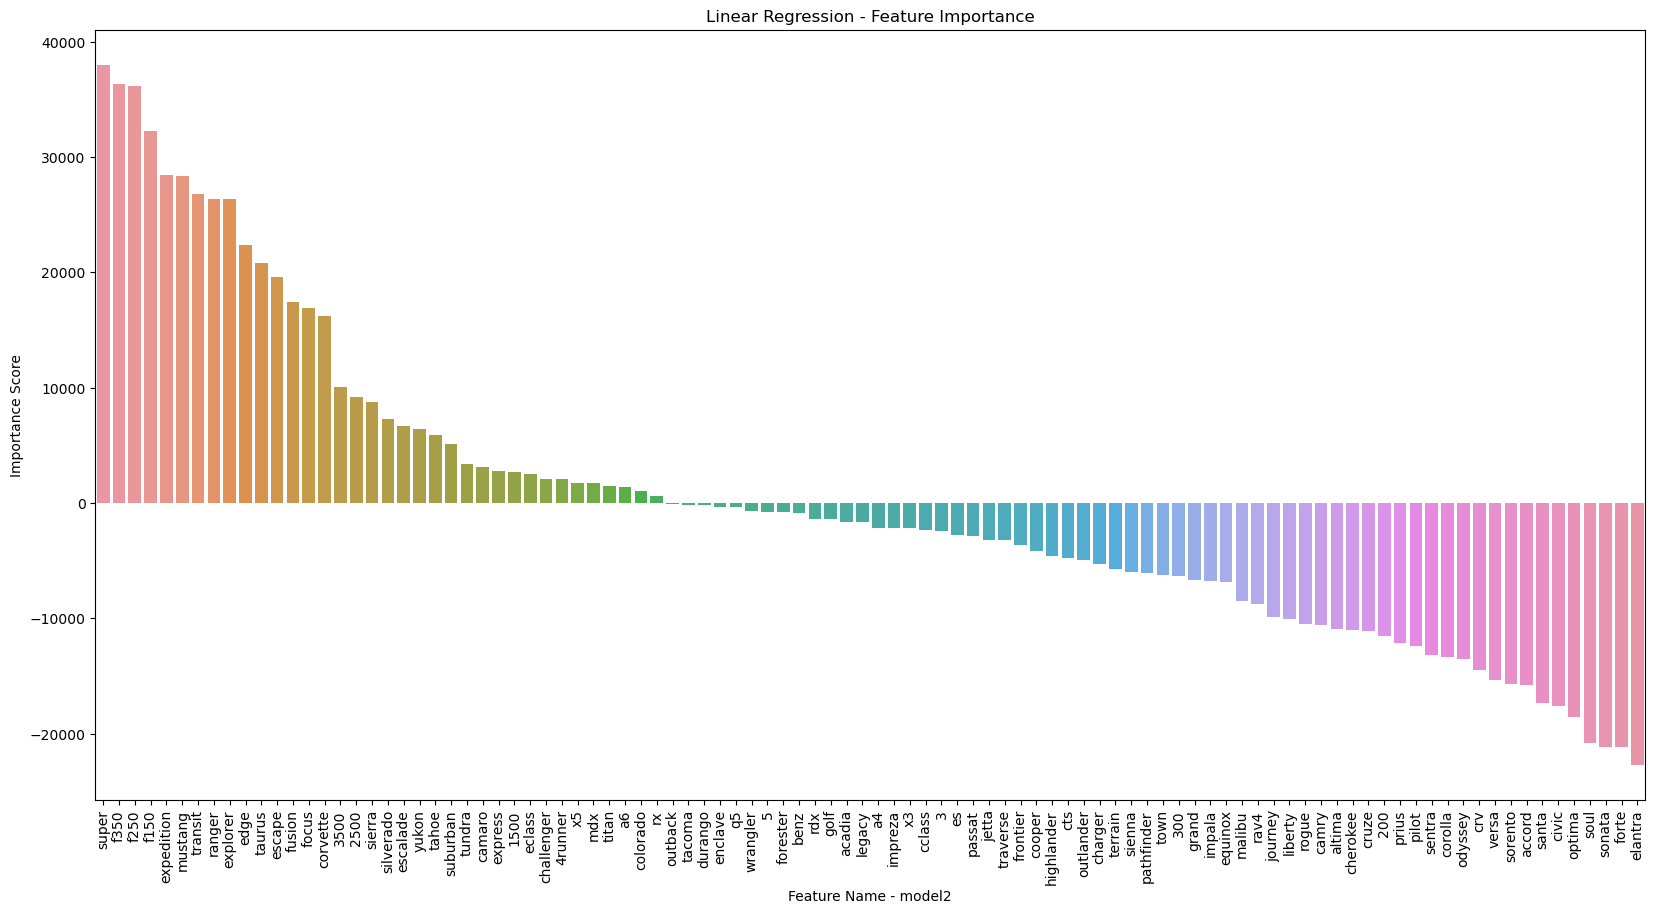

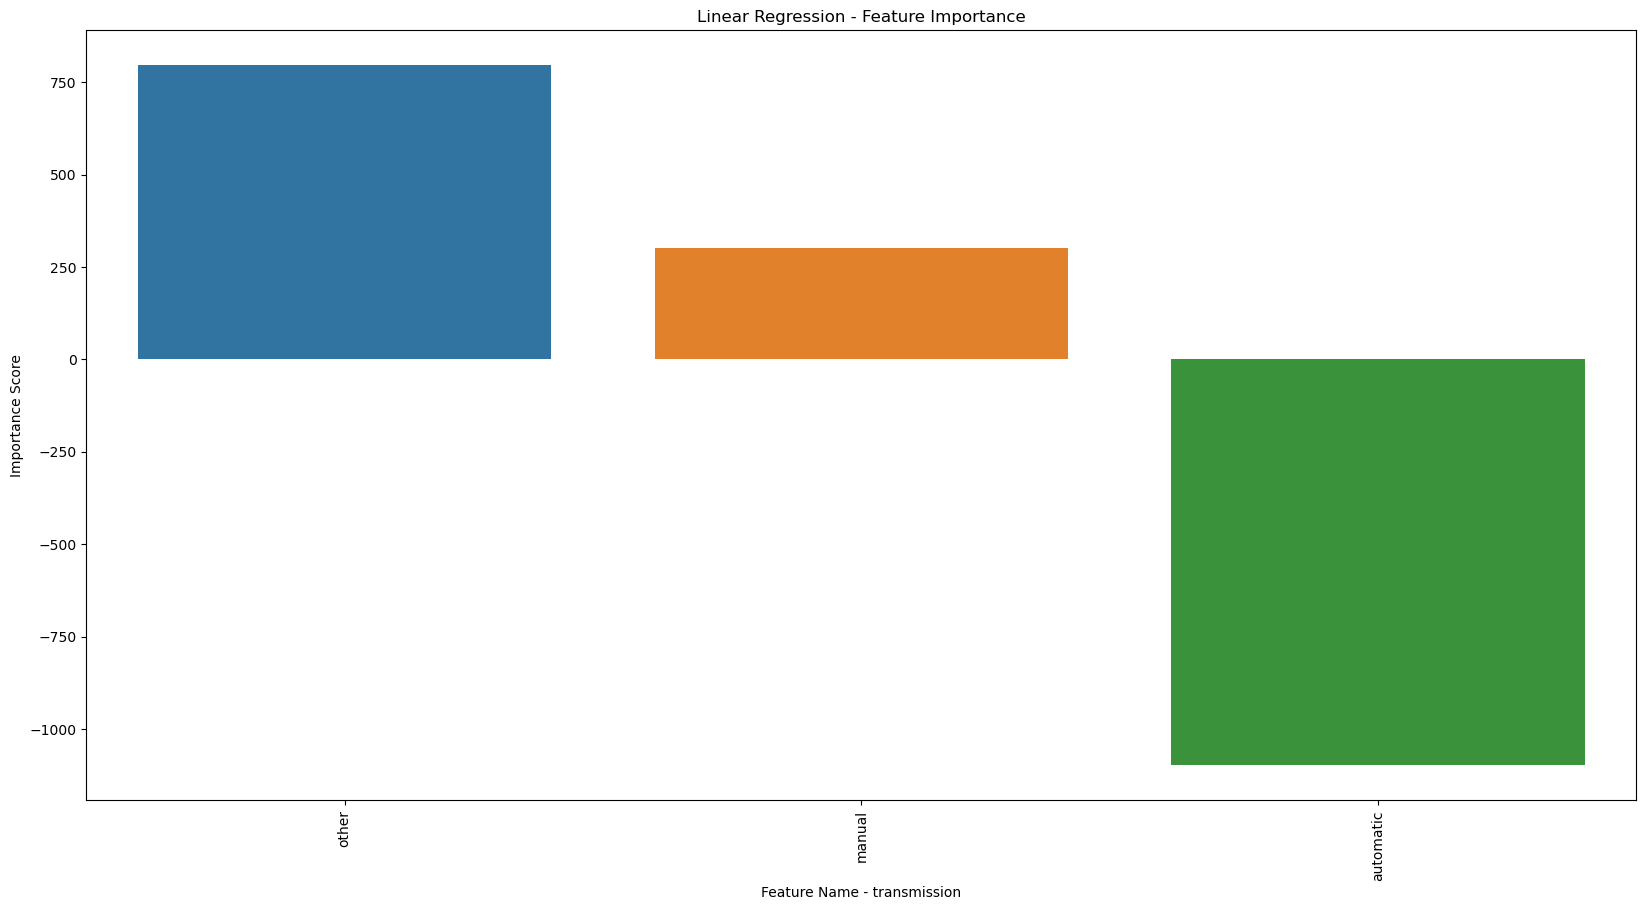

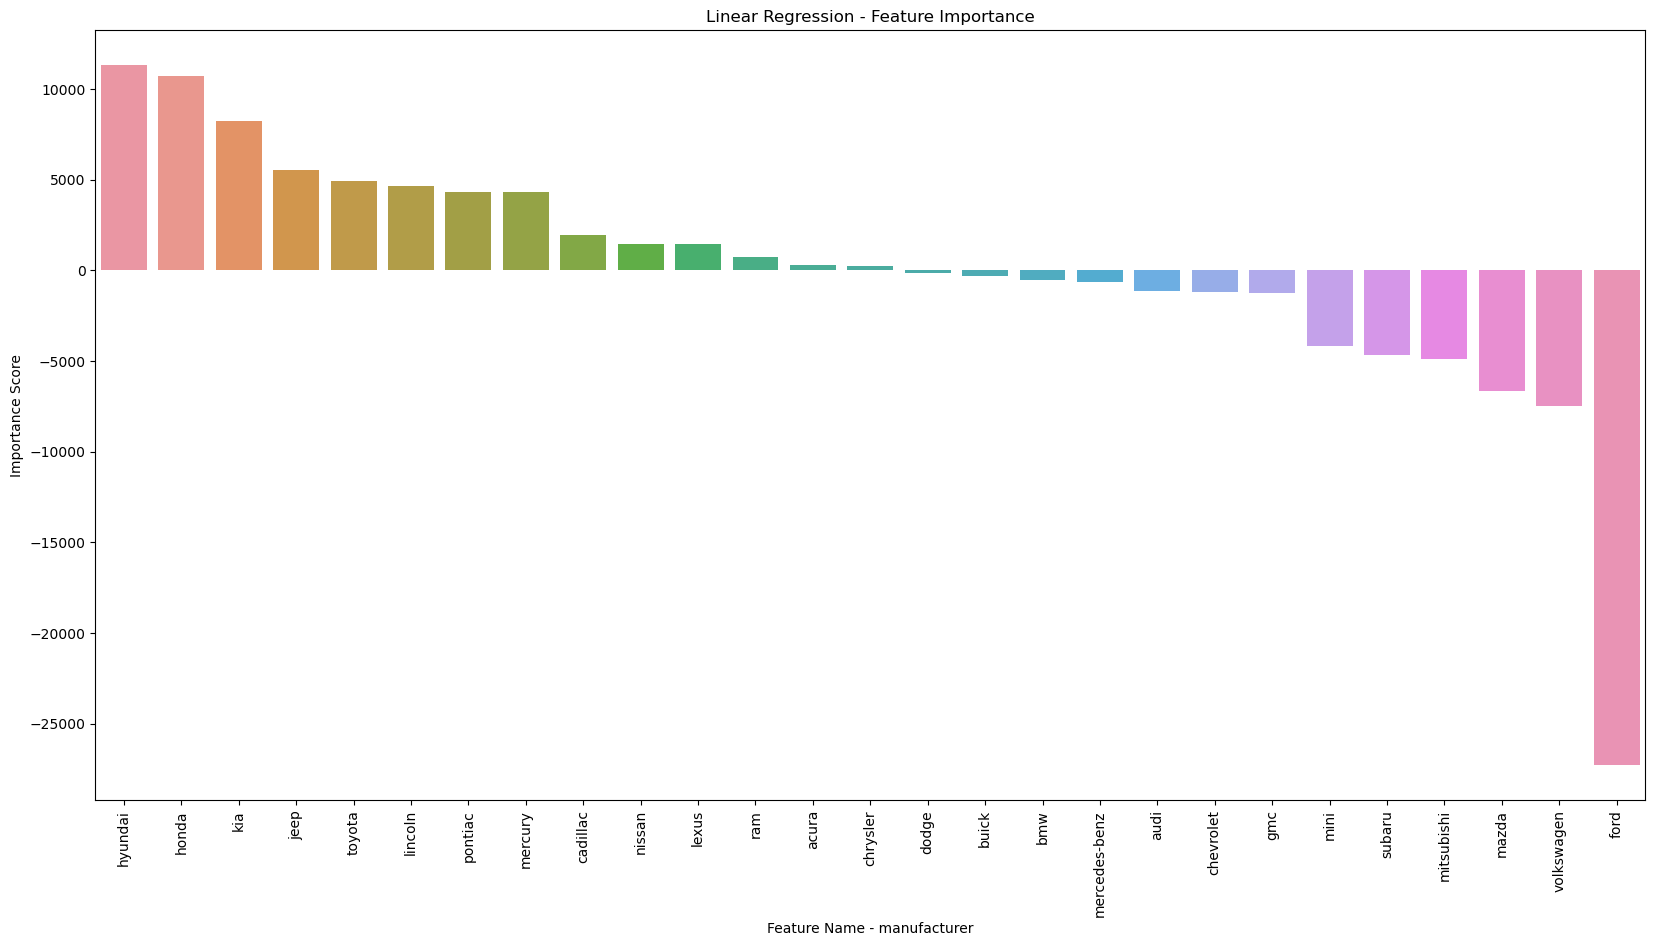

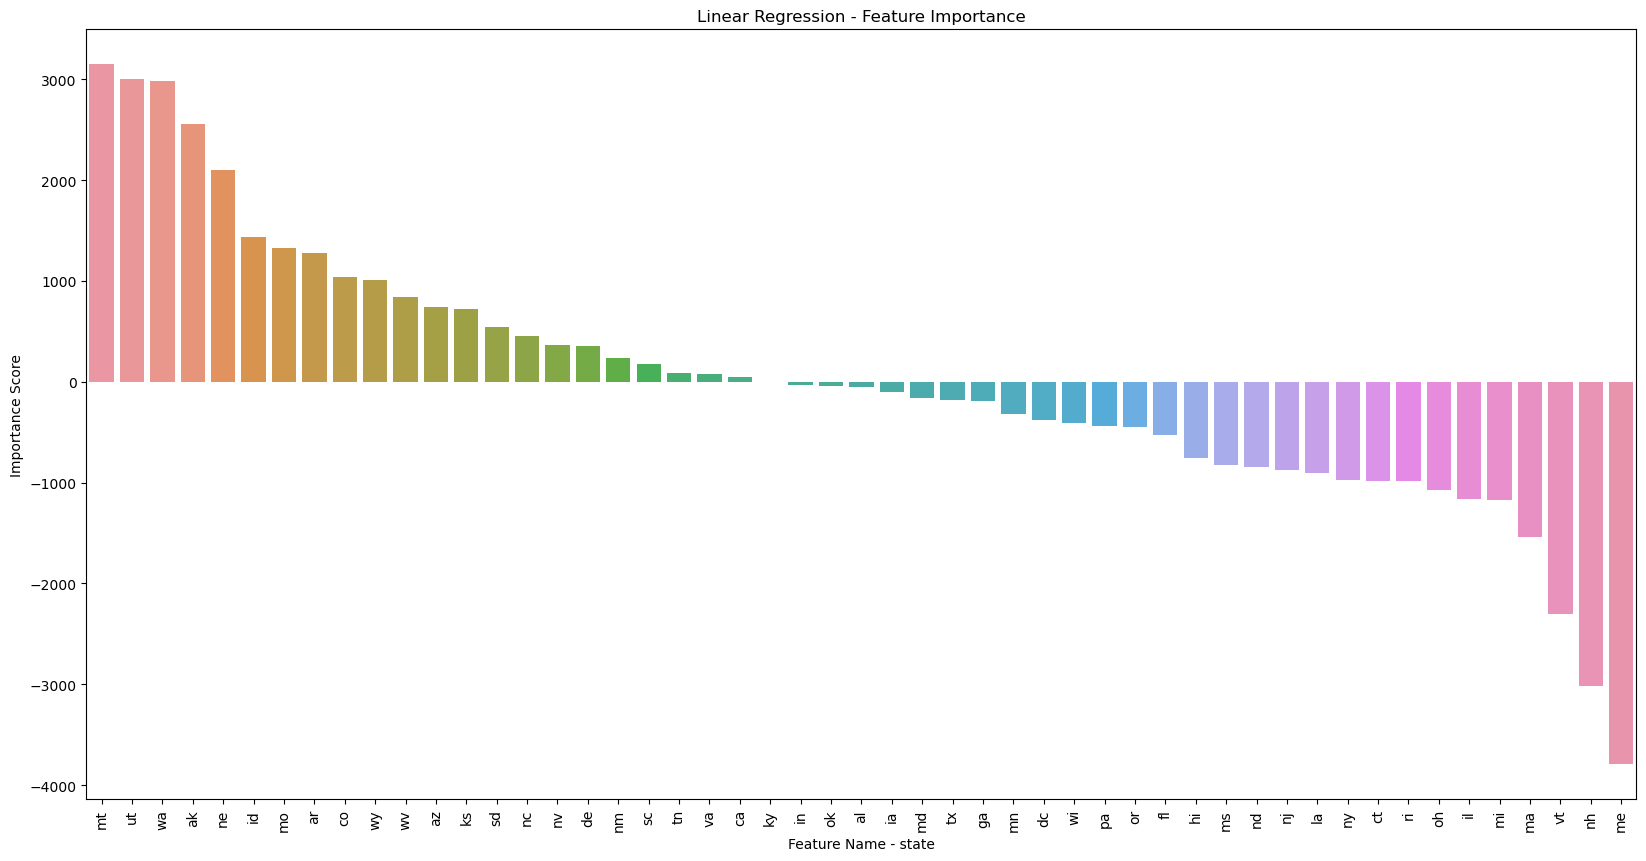

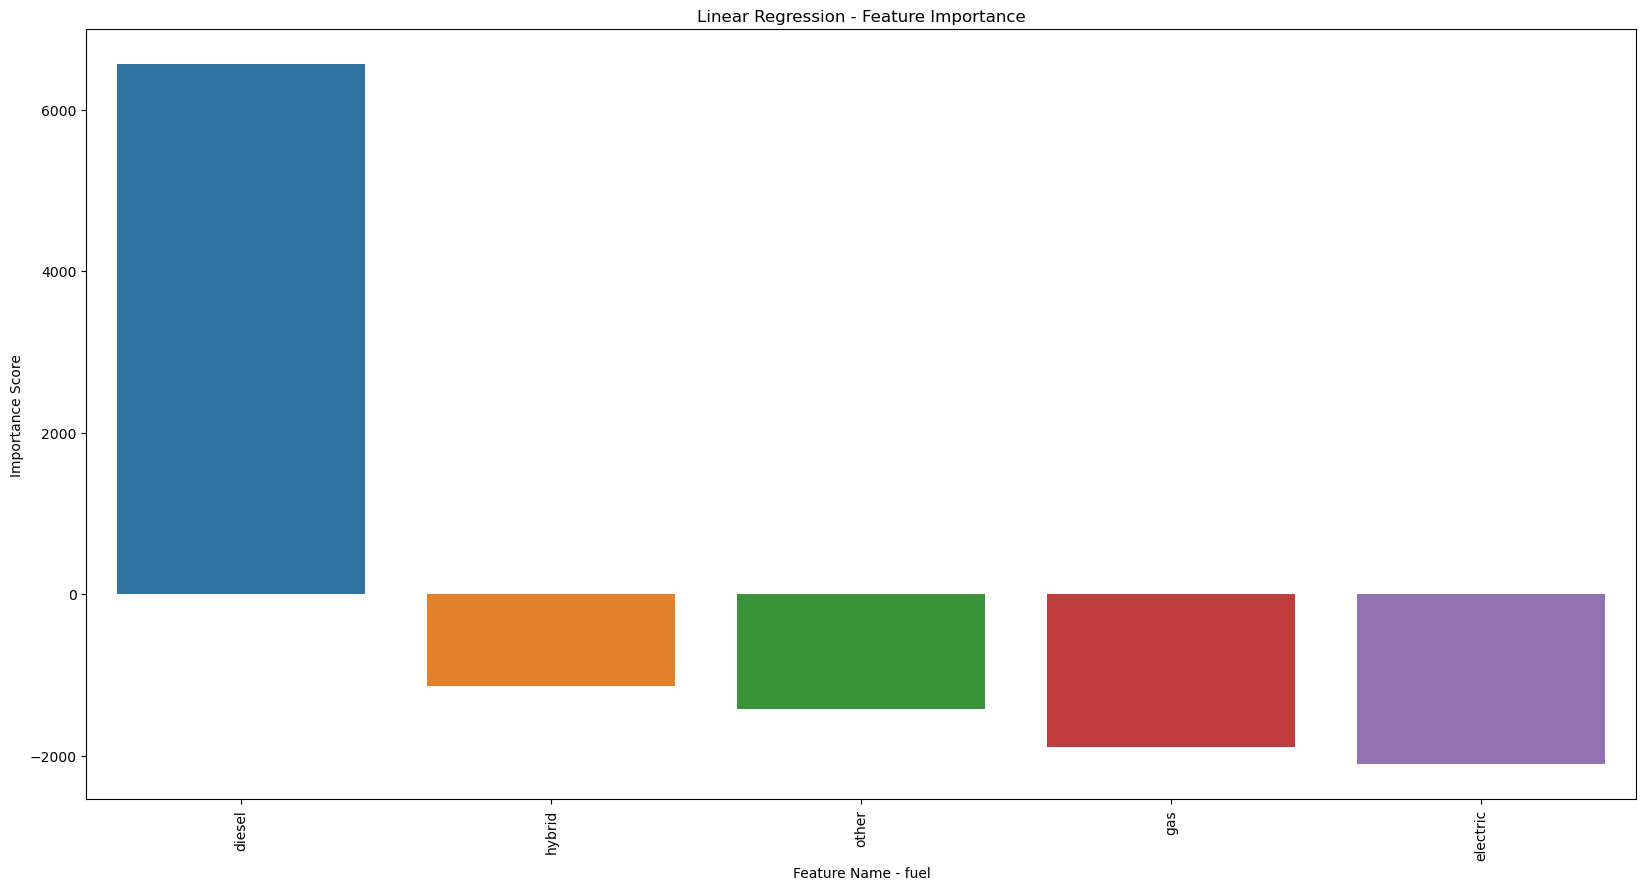

In [88]:
for i, column in enumerate(plot_feature):
    plt.figure(figsize = (20,10))
    sns.barplot(data = lr_features[lr_features['feature_m'] == column], x='feature_val', y='importance')
    plt.title('Linear Regression - Feature Importance')
    plt.xlabel('Feature Name - ' + column)
    plt.ylabel('Importance Score')
    plt.xticks(rotation = 90)
    plt.show()
    

In [94]:
# Features should be normalized over mean age so that importance value would be comparable to others features
lr_features[lr_features['feature_m'] == 'age']

,importance,feature_val,feature_m
186,-1127.950158,NaN,age


In [95]:
# Odometer should be normalized over mean reading so that importance value would be comparable to others features
lr_features[lr_features['feature_m'] == 'odometer']

,importance,feature_val,feature_m
185,-0.05663,NaN,odometer


In [105]:
from sklearn.feature_selection import f_regression,SelectKBest

X = X_train[['odometer','age']]
y = pd.DataFrame(y_train)

f_regression(X,y)

p_values = f_regression(X,y)[1]

p_values.round(3)

C:\Users\a72016\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\a72016\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0., 0.])

In [117]:
variables = pd.get_dummies(X_train,drop_first=True)
variables.head()

,odometer,age,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ford,...,model2_titan,model2_town,model2_transit,model2_traverse,model2_tundra,model2_versa,model2_wrangler,model2_x3,model2_x5,model2_yukon
id,,,,,,,,,,,,,,,,,,,,,
7315257861,37352.0,4.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7314934901,7276.0,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7316840896,82000.0,19.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7304089194,89307.0,9.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7316783285,100100.0,8.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [179]:
# cheking for correlated feature


#from statsmodels.stats.outliers_influence import variance_inflation_factor

#variables = X_train[['odometer','age']]
#vif = pd.DataFrame()
#vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
#vif["Features"] = variables.columns
#vif


In [157]:
#F-regression create simple linear regression of each feature
#This method would calculate the F statistic for each of those regressions and return the respective p values
from sklearn.feature_selection import f_regression,SelectKBest

df_clean_dummies = pd.get_dummies(df_clean, drop_first = True)
X = df_clean_dummies.drop('price',axis = 1)
y = df_clean_dummies['price']

f_regression(X,y)

p_values = f_regression(X,y)[1]

p_values.round(3) # This output in scincetific notation array lets convert them using 'round' method


array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.446, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.661, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.004, 0.   , 0.   , 0.   , 0.007, 0.   , 0.052,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.023,
       0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.107, 0.808,
       0.   , 0.   , 0.   , 0.528, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.12 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.014, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.607, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.493, 0.   , 0.013, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.005, 0.817, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.121, 0.   , 0.   , 0.   ,
       0.   , 0.   ,

In [158]:
# Creating summary table of encoded features that are not correlated to price and thus, can be dropped from the dataset
model_summry = pd.DataFrame(data=variables.columns, columns=['Features'])
model_summry['p-values'] = p_values.round(3)
model_summry[model_summry['p-values']>0.05]

,Features,p-values
15,manufacturer_lexus,0.446
28,fuel_electric,0.661
44,state_hi,0.052
61,state_nd,0.107
62,state_ne,0.808
66,state_nv,0.528
74,state_sd,0.120
93,model2_acadia,0.607
99,model2_cclass,0.493
111,model2_durango,0.817


In [161]:
# dropping the values that are not correlated with price
state_to_drop = {'hi','nd','ne','nv','sd'}
df_clean_pval = df_clean[~df_clean['state'].isin(state_to_drop)]

In [162]:
mfg_to_drop = {'lexus'}
df_clean_pval = df_clean_pval[~df_clean_pval['manufacturer'].isin(mfg_to_drop)]

In [163]:
model_to_drop = {'acadia','cclass','durango','express','frontier','golf','x3'}
df_clean_pval = df_clean_pval[~df_clean_pval['model2'].isin(model_to_drop)]

In [164]:
df_clean_pval

,price,manufacturer,fuel,odometer,title_status,transmission,state,age,model2
id,,,,,,,,,
7316814884,33590,gmc,gas,57923.0,clean,other,al,8.0,sierra
7316814758,22590,chevrolet,gas,71229.0,clean,other,al,12.0,silverado
7316814989,39590,chevrolet,gas,19160.0,clean,other,al,2.0,silverado
7316743432,30990,toyota,gas,41124.0,clean,other,al,5.0,tundra
7316356412,15000,ford,gas,128000.0,clean,automatic,al,9.0,f150
...,...,...,...,...,...,...,...,...,...
7302106121,6977,honda,gas,112396.0,clean,automatic,wy,11.0,civic
7302104597,4977,nissan,gas,154917.0,clean,automatic,wy,17.0,altima
7301954392,41990,toyota,gas,36630.0,clean,other,wy,3.0,4runner


In [165]:
X = df_clean_pval.drop(columns = ['price'])
y = df_clean_pval['price']

In [166]:
pipe_lr.fit(X_train,y_train)

C:\Users\a72016\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 3, 4, 5, 7])])),
                ('step2', LinearRegression())])

In [167]:
y_pred = pipe_lr.predict(X_train)
print('mse is '+ str(mean_squared_error(y_pred,y_train)))
print('r2-score is ' + str(r2_score(y_pred,y_train)))

mse is 41896287.57570518
r2-score is 0.6691577696108386


In [168]:
y_pred = pipe_lr.predict(X_test)
print('mse is '+ str(mean_squared_error(y_pred,y_test)))
print('r2-score is ' + str(r2_score(y_pred,y_test)))

mse is 40581552.64102557
r2-score is 0.6811381057436273


In [ ]:
# dropping the values that are not correlated with price didn't improve the correlation

In [189]:
df_clean_pval.groupby('manufacturer').mean().round(1)

C:\Users\a72016\AppData\Local\Temp\ipykernel_156512\1993824791.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean_pval.groupby('manufacturer').mean().round(1)


,price,odometer,age
manufacturer,,,
acura,26030.0,62257.6,6.5
audi,21694.1,67533.2,7.6
bmw,21873.2,68759.3,7.9
buick,23154.9,76568.4,6.6
cadillac,20769.6,102697.4,10.2
chevrolet,20974.3,96779.3,9.3
chrysler,11469.9,100579.6,9.2
dodge,18074.1,76486.1,7.5
ford,20895.1,102140.0,9.3


In [169]:
step3 = Ridge(alpha =10)

In [170]:
pipe_ridge = Pipeline([('step1',step1),
                 ('ridge',step3)])

In [171]:
pipe_ridge.fit(X_train,y_train)

C:\Users\a72016\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 3, 4, 5, 7])])),
                ('ridge', Ridge(alpha=10))])

In [172]:
y_pred = pipe_ridge.predict(X_train)
print('mse is '+ str(mean_squared_error(y_pred,y_train)))
print('r2-score is ' + str(r2_score(y_pred,y_train)))

mse is 41909163.35367233
r2-score is 0.6680263695126847


In [173]:
# Using model on Test Data and getting similar mse and r2
y_pred = pipe_ridge.predict(X_test)
print('mse is '+ str(mean_squared_error(y_pred,y_test)))
print('r2-score is ' + str(r2_score(y_pred,y_test)))

mse is 40587143.71619114
r2-score is 0.6800659734992018


In [174]:
features_names = pipe_ridge.named_steps['step1'].get_feature_names_out()
importance = pipe_ridge.named_steps['ridge'].coef_

In [175]:
ridge_features = pd.DataFrame({'feature':features_names, 'importance':importance})
ridge_features = ridge_features.sort_values('importance', ascending = False)
ridge_features

,feature,importance
111,ohe__model2_corvette,15777.384668
170,ohe__model2_super,11338.833124
129,ohe__model2_f350,9750.490595
92,ohe__model2_3500,9669.954980
128,ohe__model2_f250,9613.450835
...,...,...
110,ohe__model2_corolla,-7508.703623
144,ohe__model2_malibu,-8734.075269
134,ohe__model2_fusion,-9060.084565
130,ohe__model2_focus,-9594.510867


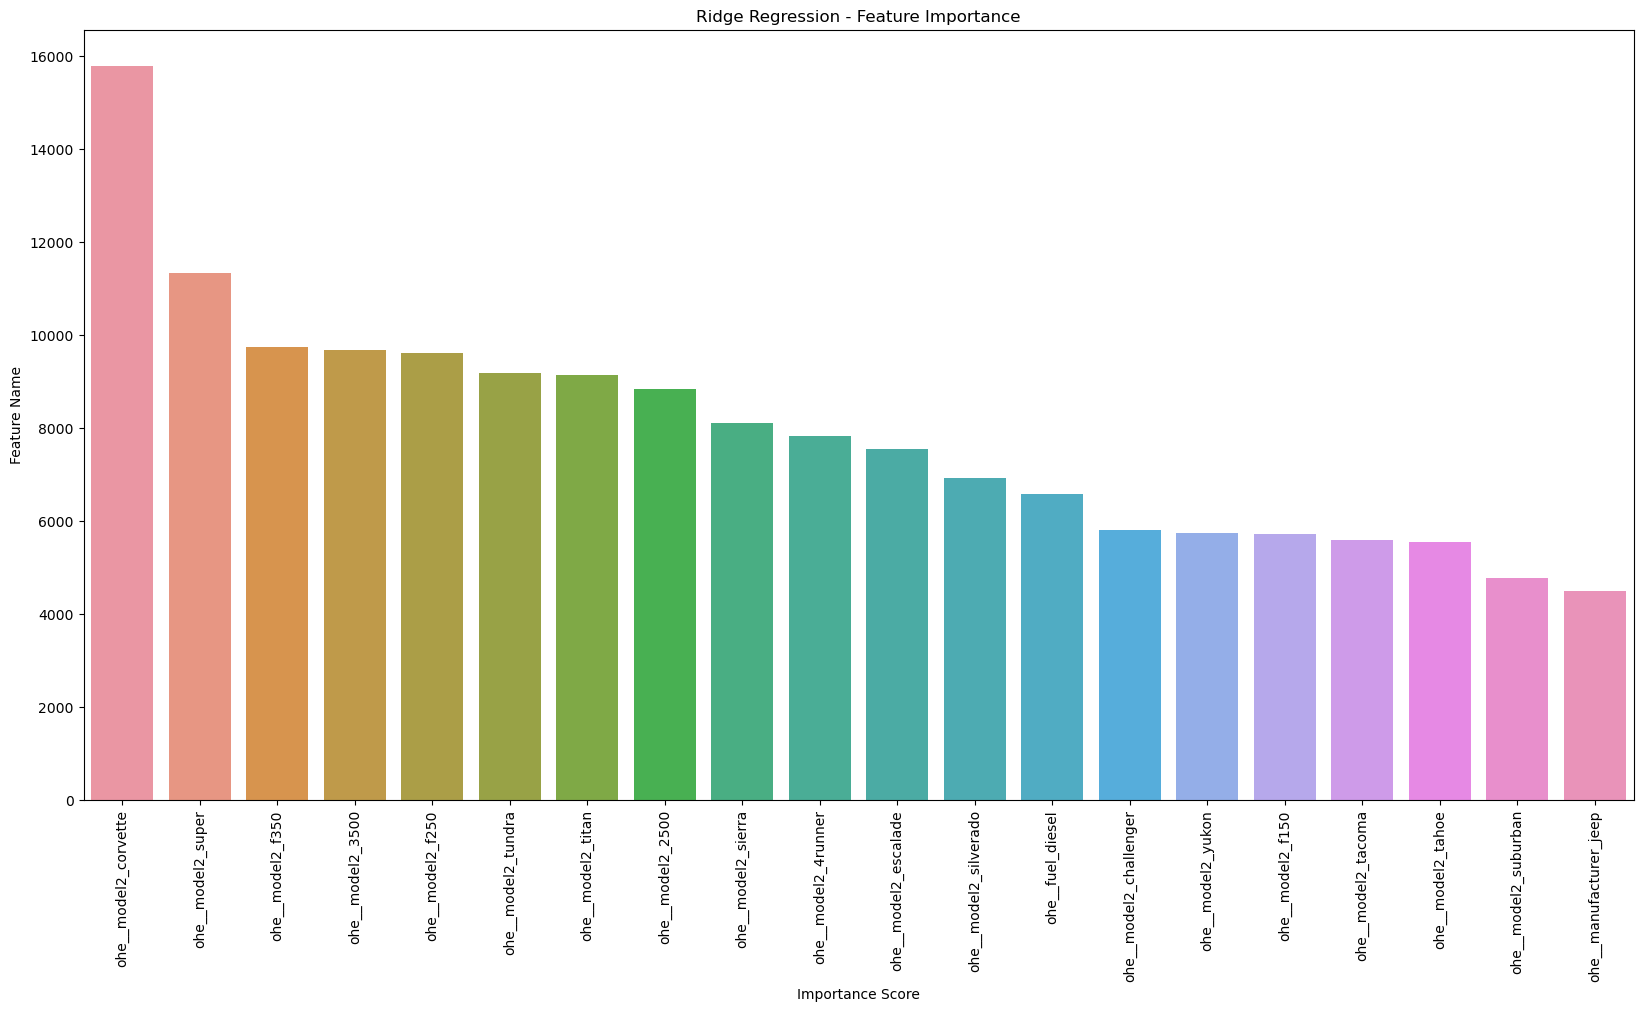

In [176]:
plt.figure(figsize = (20,10))
sns.barplot(data = ridge_features.head(20), x='feature', y='importance')
plt.title('Ridge Regression - Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.xticks(rotation = 90)
plt.show()

# Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Odometer should be normalized over mean reading so that importance value would be comparable to others features
# Features should be normalized over mean age so that importance value would be comparable to others features
# Simplify model, manufacturer and state combination 
# Create new complex features that are combination of Manufacturer, Model and Transmission and/or Fuel type 
# and potentially create groups for odometer reading if normalization doesn't give better results  

# For value estimation, models can be categorized into type like trucks, cars, vans etc. as certain type of cars
# are generally higher prices due to their size

# Check for colinearity as age might be related to odometer reading 


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
# Recommendations
# Choose cars from the following Manufacturers : {Hyundai, Honda, Kiam Jeep, Lincoln, etc.} while avoid cars like : {ford, Volkswagen, mazda, Mitsubishi, Subaru} except certain model for these manufactures like {F250,F150 etc.|

# Choose cars with lower age and lower odometer rating as they higher price and thus, higher revenue; 

# Choose 'diesel' cars as they favor higher price and prefer 'gas' cars over 'electric' cars

# Cars with transmission type as 'other' favor higher price but it might be due to the fact that data doesn't exist for certain type of higher priced car and not because of the 'transmission type'.
